In [1]:
## network.py
## citation network creation script
## author: J Curry
## date: 24/01/2022
##

## imports ##
# from unicodedata import name
import os
import pandas as pd
# from google.colab import files

import metaknowledge as mk
import metaknowledge.contour.plotting as mkv
import community as community_louvain
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt 
# %matplotlib inline

In [11]:
#RC = mk.RecordCollection(inCollection='savedrecs(8).txt', name='savedrecs(8)', extension='.txt')
#RC = mk.RecordCollection(inCollection='WoSRecords//savedrecs(12).txt', name='savedrecs(12)', extension='.txt')
RC = mk.RecordCollection(inCollection="WoSRecords", extension=".txt")
#repr(RC)
print('RC is a ' + str(RC))
R = RC.peek()
print(R)

RC is a RecordCollection(.txt-files-from-C:\docNonNetwork\WoSRecords)
WOSRecord(Pose Estimation of Omnidirectional Camera with Improved EPnP Algorithm)


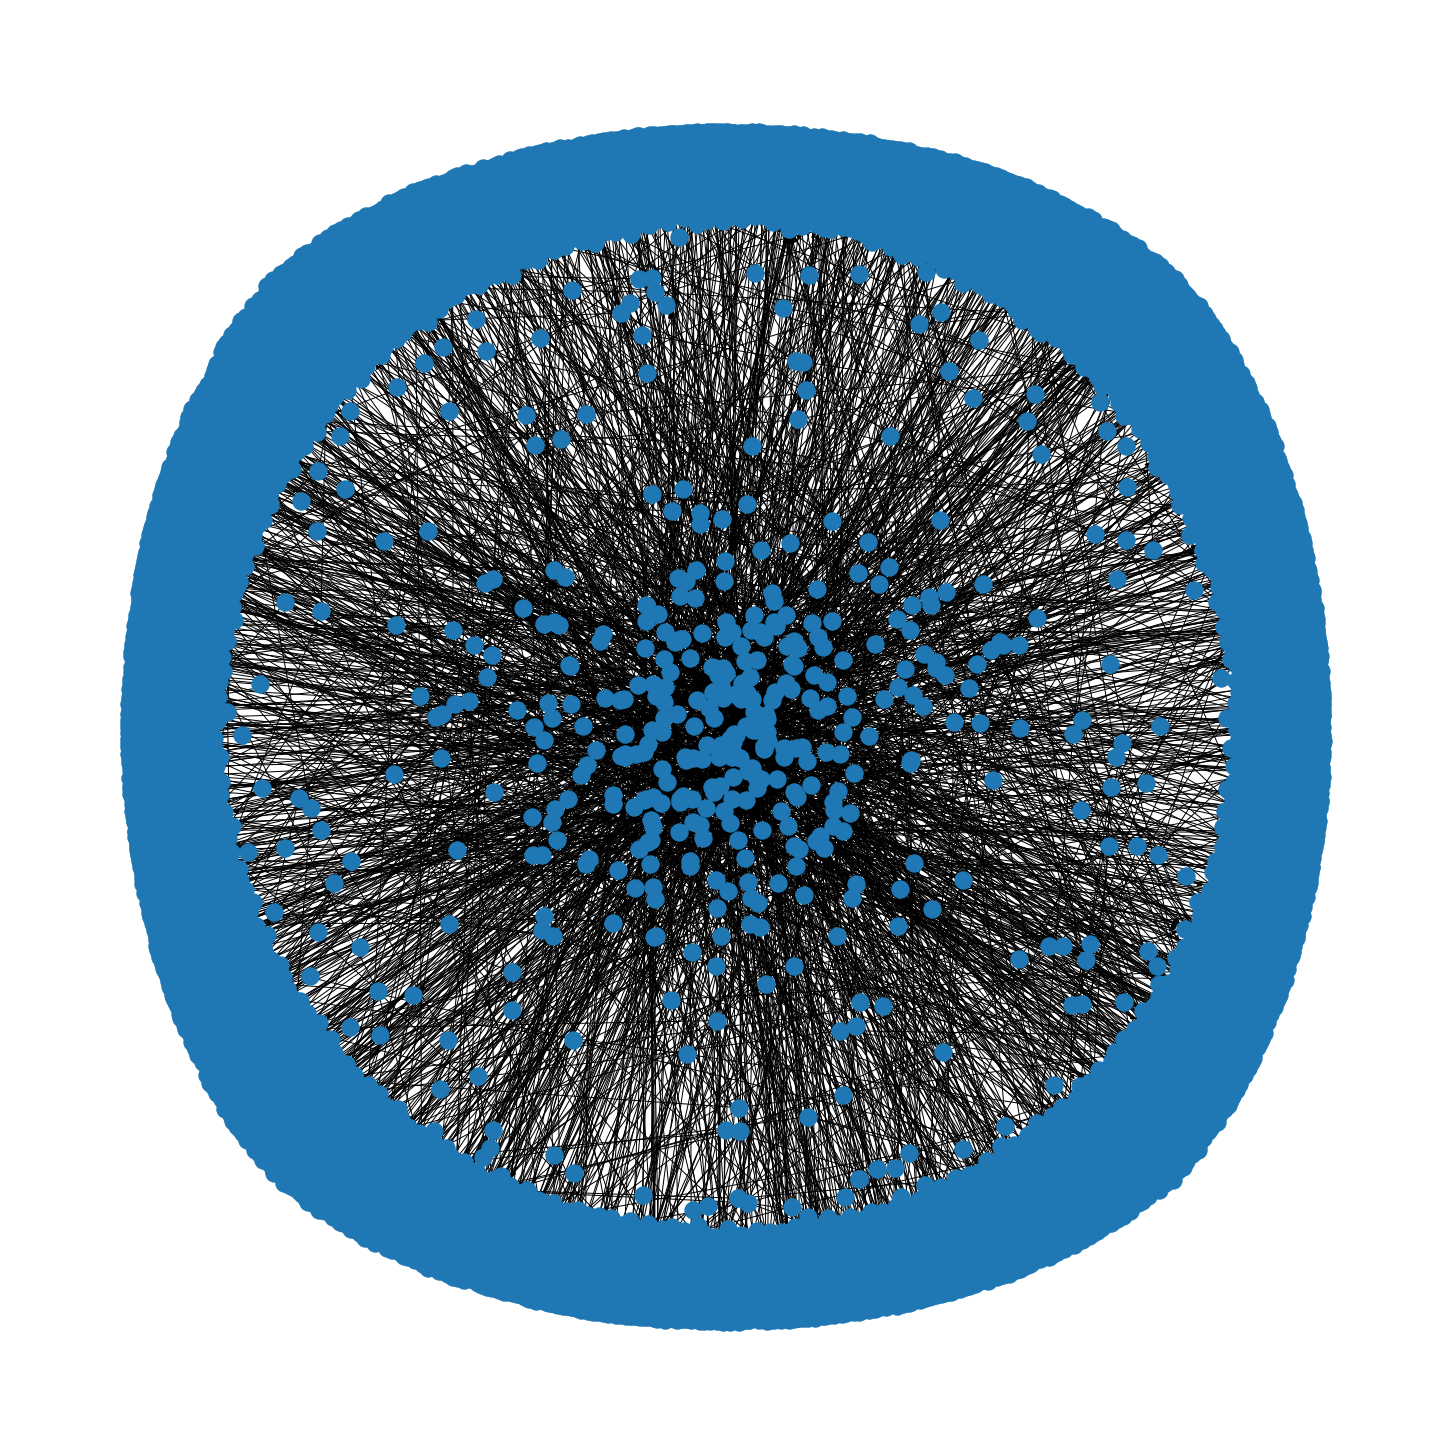

In [16]:
networkType = "Citation"
#nodeType = "full"
#nodeType = "original"
nodeType = "author"
#nodeType = "journal"
#nodeType = "year"

# Create the Network
# ******************
if networkType == "CoCitation":
    net = RC.networkCoCitation(nodeType = nodeType, coreOnly=True,)
    directed = False
elif networkType == "CoAuthor":
    net = RC.networkCoAuthor()
    directed = False
elif networkType == "Citation":
    net = RC.networkCitation(nodeType=nodeType, coreOnly=False)
    directed = True
else:
    print("Please ensure networkType has been set to one of the accepted values")

# Simplify the Network
# ********************
mk.dropEdges(net, minWeight = 2, dropSelfLoops = True) 
# net.remove_nodes_from(nx.isolates(net)) # Remove nodes which are isolates


# Add Node Data
# *************
if not directed: 
    partition = community_louvain.best_partition(net)
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        comm = partition[n]
        net.add_node(n, community=comm, betweenness=betw)
else: 
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        net.add_node(n, betweenness=betw)


plt.rcParams['figure.figsize'] = [20, 20]
nx.draw_spring(net, with_labels = False, arrows = True) #why no edges? 

# giantCitation = max((net.subgraph(c) for c in nx.connected_components(net)), key=len)
# eig = nx.eigenvector_centrality(giantCitation)
# size = [2000 * eig[node] for node in giantCitation]

# # nx.draw_spring(giantCoAuth,
# #     node_size = size,
# #     with_labels = True,
# #     font_size = 5,
# #     node_color = '#FFFFFF',
# #     edge_color = '#D4D5CE',
# #     alpha = .95)

# partition_ci = community_louvain.best_partition(giantCitation) 
# modularity_ci = community_louvain.modularity(partition_ci, giantCitation) 
# print('Modularity:', modularity_ci)

# colors_ci = [partition_ci[n] for n in giantCitation.nodes()] 
# nx.draw_spring(giantCitation, node_color=colors_ci, with_labels = False, cmap=plt.cm.tab10, node_size = 100, edge_color = "#D4D5CE")



In [13]:
# mk.writeGraph(net, "CitationNetwork")

# # Create the citations file 
# minYear = 1950
# maxYear = 2022

# years = range(minYear, maxYear+1)

# dictionary = {"author": [],
#               "journal": [],
#               "cite-string": [],
#               "num-cites": [],
#               "RPY": [],
#               "CPY": []}

# for i in years:
#     try:
#         RCyear = RC.yearSplit(i, i)
#         if len(RCyear) > 0:
#             citations = RCyear.getCitations(pandasFriendly=True)
#             length = len(citations['year'])
#             citations['CPY'] = [i]*length

#             dictionary['CPY'] += citations['CPY']
#             dictionary['author'] += citations['author']
#             dictionary['journal'] += citations['journal']
#             dictionary['cite-string'] += citations['citeString']
#             dictionary['num-cites'] += citations['num-cites']
#             dictionary['RPY'] += citations['year']
#     except:
#         pass

# multi_citations = pd.DataFrame.from_dict(dictionary)
# multi_citations.to_csv("generated_datasets/network_citation.csv")

# Create Link to Heatmap
#from IPython.display import display, HTML
#display(HTML('<a href="mkD3_static/network.html" target="_blank">Open network graph</a>'))

Modularity: 0.7507837609044994


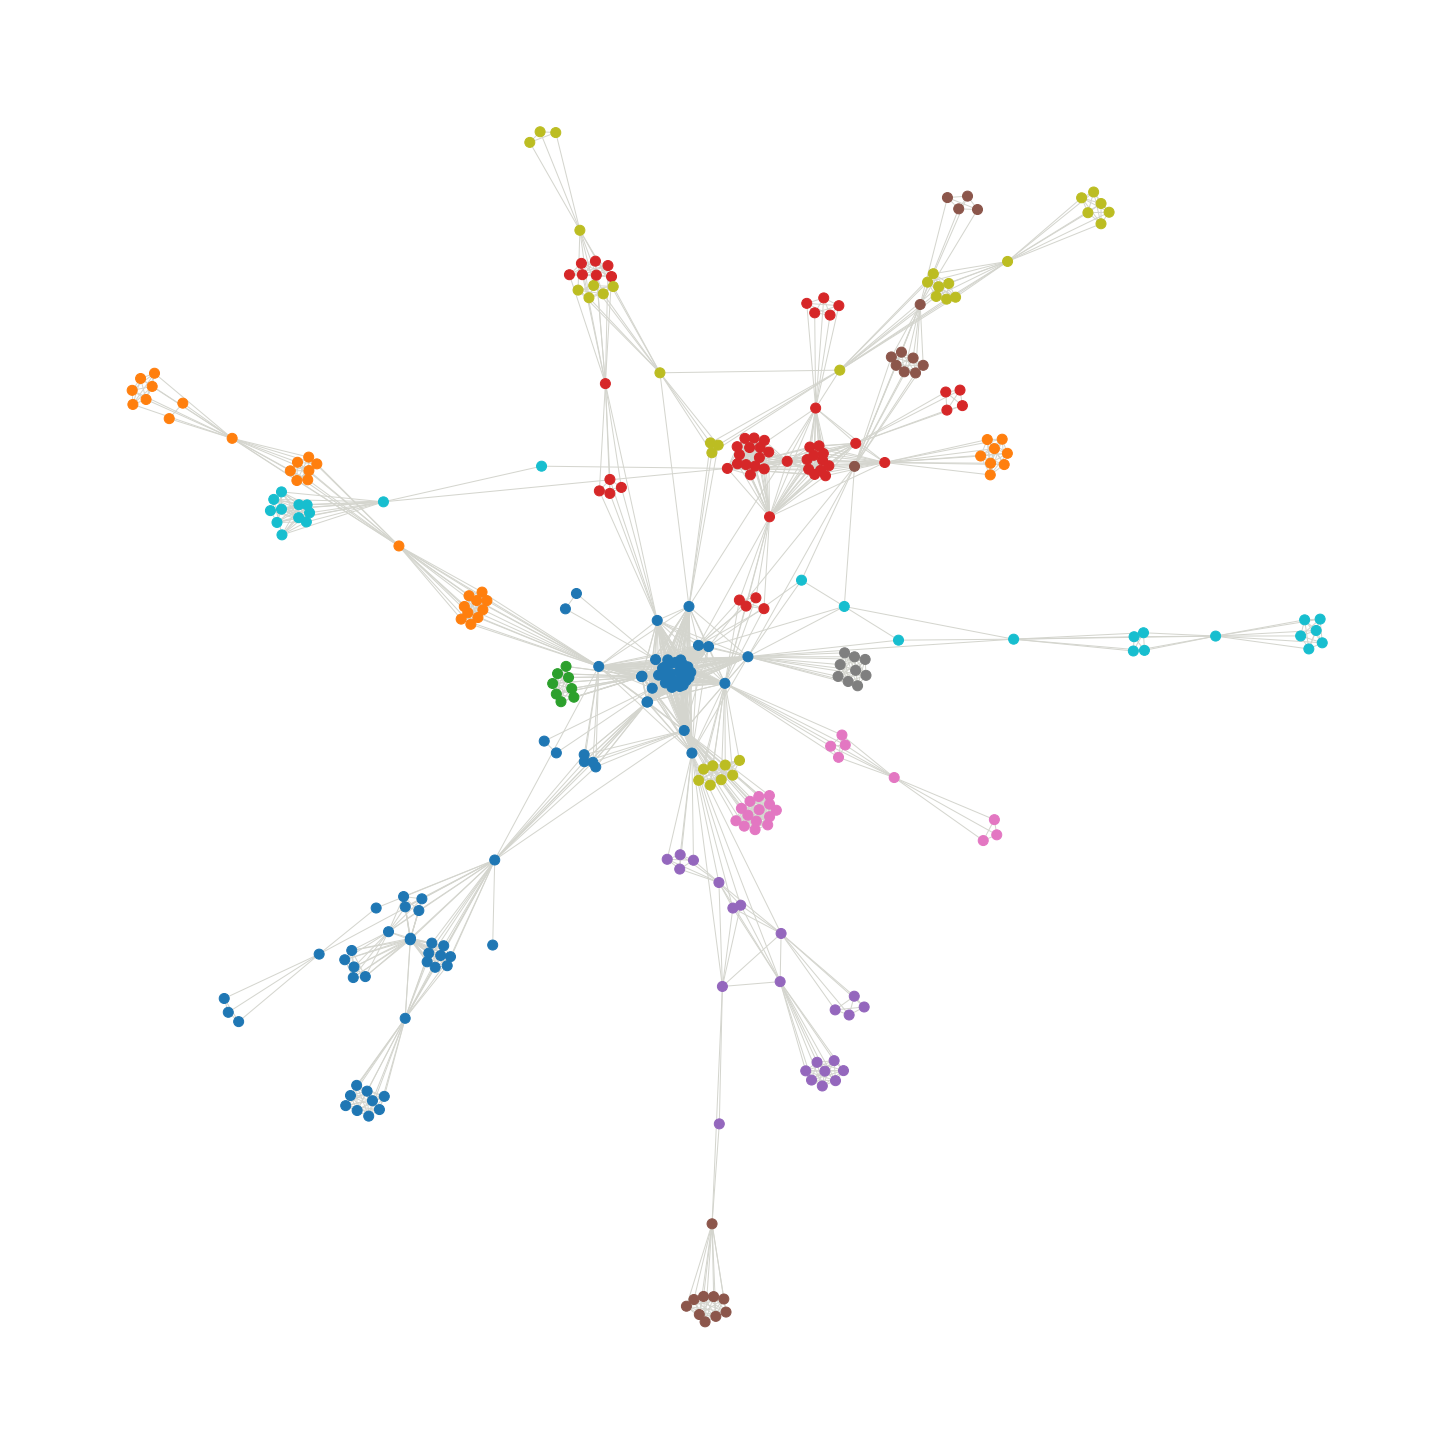

In [14]:
# Variables to Set
# ****************
networkType = "CoAuthor"
nodeType = "full"

# Create the Network
# ******************
if networkType == "CoCitation":
    net = RC.networkCoCitation(nodeType = nodeType, coreOnly=True)
    directed = False
elif networkType == "CoAuthor":
    net = RC.networkCoAuthor()
    directed = False
elif networkType == "Citation":
    net = RC.networkCitation(nodeType=nodeType, coreOnly=True)
    directed = True
else:
    print("Please ensure networkType has been set to one of the accepted values")

# Simplify the Network
# ********************
#mk.dropEdges(net, minWeight = 2, dropSelfLoops = True) 
# net.remove_nodes_from(nx.isolates(net)) # Remove nodes which are isolates


# Add Node Data
# *************
if not directed: 
    partition = community_louvain.best_partition(net)
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        comm = partition[n]
        net.add_node(n, community=comm, betweenness=betw)
else: 
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        net.add_node(n, betweenness=betw)

giantCoAuth = max((net.subgraph(c) for c in nx.connected_components(net)), key=len)
eig = nx.eigenvector_centrality(giantCoAuth)
size = [2000 * eig[node] for node in giantCoAuth]
plt.rcParams['figure.figsize'] = [20, 20]
# nx.draw_spring(giantCoAuth,
#     node_size = size,
#     with_labels = True,
#     font_size = 5,
#     node_color = '#FFFFFF',
#     edge_color = '#D4D5CE',
#     alpha = .95)

partition_ci = community_louvain.best_partition(giantCoAuth) 
modularity_ci = community_louvain.modularity(partition_ci, giantCoAuth) 
print('Modularity:', modularity_ci)

colors_ci = [partition_ci[n] for n in giantCoAuth.nodes()] 
nx.draw_spring(giantCoAuth, node_color=colors_ci, with_labels = False, cmap=plt.cm.tab10, node_size = 100, edge_color = "#D4D5CE")

# nx.draw_spring(net, with_labels = True, arrows = True) #why no edges? 
# mk.writeGraph(net, "CoAuthorNetwork")

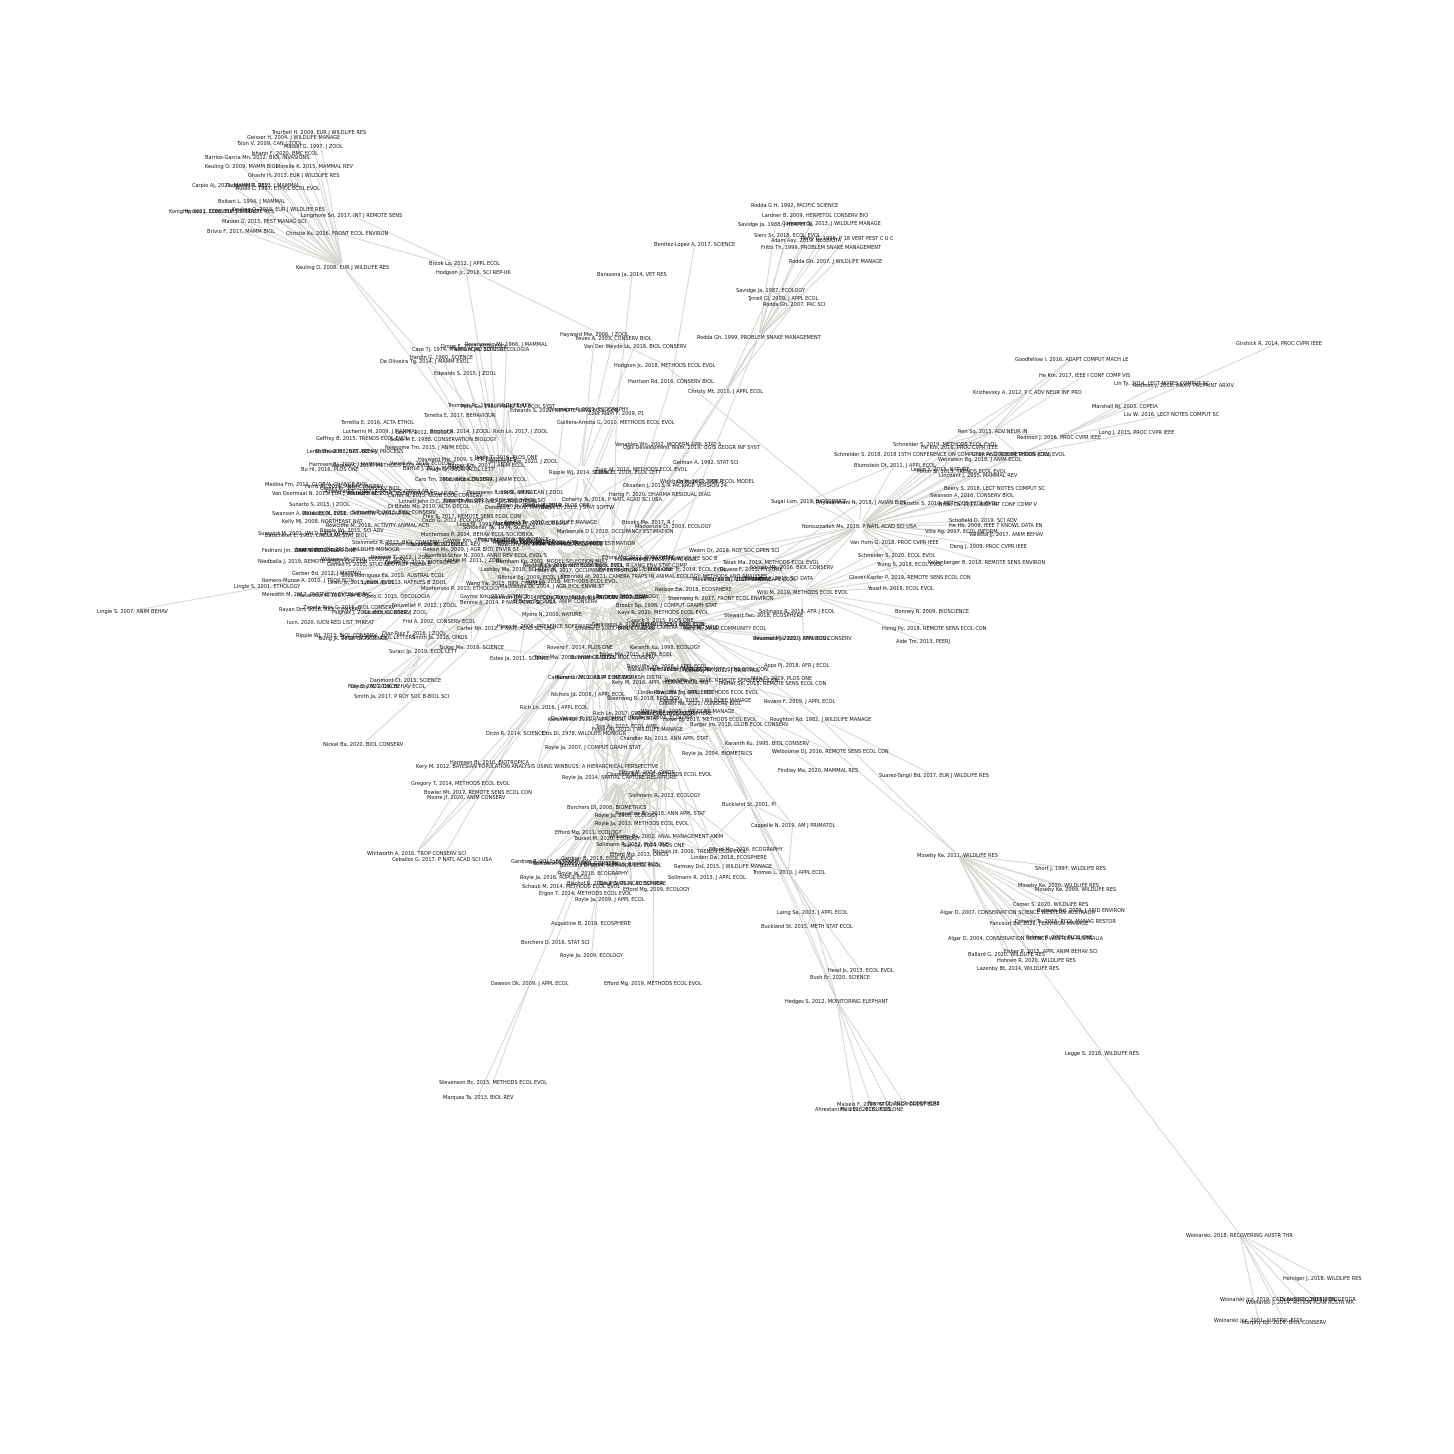

In [17]:
# Variables to Set
# ****************
networkType = "CoCitation"
nodeType = "full"

# Create the Network
# ******************
if networkType == "CoCitation":
    net = RC.networkCoCitation(nodeType = nodeType, coreOnly=False)
    directed = False
elif networkType == "CoAuthor":
    net = RC.networkCoAuthor()
    directed = False
elif networkType == "Citation":
    net = RC.networkCitation(nodeType=nodeType, coreOnly=True)
    directed = True
else:
    print("Please ensure networkType has been set to one of the accepted values")

# Simplify the Network
# ********************
mk.dropEdges(net, minWeight = 4, dropSelfLoops = True) 
# net.remove_nodes_from(nx.isolates(net)) # Remove nodes which are isolates


# Add Node Data
# *************
if not directed: 
    partition = community_louvain.best_partition(net)
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        comm = partition[n]
        net.add_node(n, community=comm, betweenness=betw)
else: 
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        net.add_node(n, betweenness=betw)

#nx.draw_spring(net, with_labels = False, arrows = True) #why no edges? 
#mk.writeGraph(net, "CoCitationNetwork")

# (G.subgraph(c) for c in connected_components(G))
# nx.connected_component_subgraphs(net)

giantJournal = max((net.subgraph(c) for c in nx.connected_components(net)), key=len)

# nx.draw_spring(giantJournal, with_labels = False, node_size = 75, 
#               node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)

eig = nx.eigenvector_centrality(giantJournal)
size = [2000 * eig[node] for node in giantJournal]
plt.rcParams['figure.figsize'] = [20, 20]
nx.draw_spring(giantJournal,
    node_size = size,
    with_labels = True,
    font_size = 5,
    node_color = '#FFFFFF',
    edge_color = '#D4D5CE',
    alpha = .95)




Modularity: 0.5773231579199746


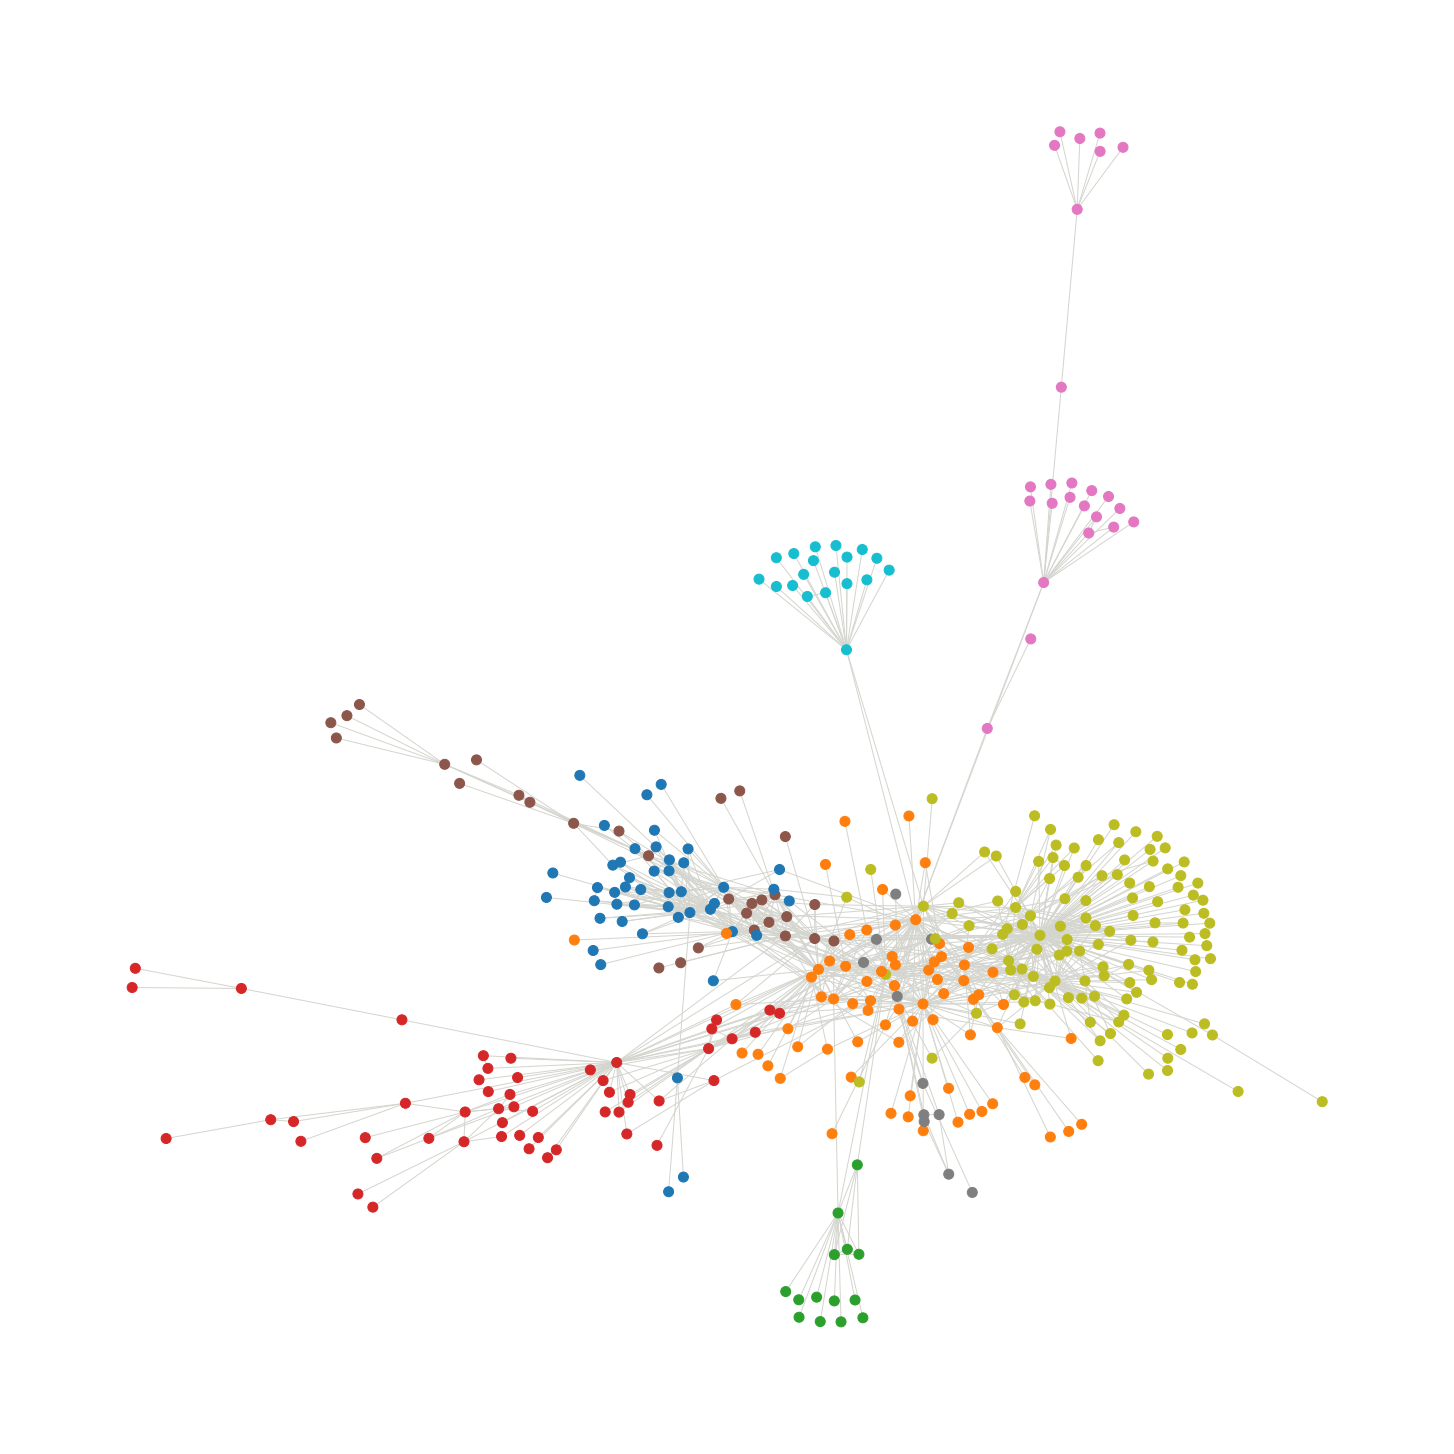

In [18]:

partition_ci = community_louvain.best_partition(giantJournal) 
modularity_ci = community_louvain.modularity(partition_ci, giantJournal) 
print('Modularity:', modularity_ci)

colors_ci = [partition_ci[n] for n in giantJournal.nodes()] 
nx.draw_spring(giantJournal, node_color=colors_ci, with_labels = False, cmap=plt.cm.tab10, node_size = 100, edge_color = "#D4D5CE")


In [ ]:
## Lists of check/comparision/sanity inclusion papers 

# CV ML 
CVMLList = ("Greenberg S. Automated Image Recognition for Wildlife Camera Traps: Making it Work for You. Research report, University of Calgary: Prism Digital Repository; 2020.",
"Wei W, Luo G, Ran J, Li J. Zilong: A tool to identify empty images in camera-trap data. Ecological Informatics. 2020 Jan 1;55:101021.",
"Falzon G, Lawson C, Cheung KW, Vernes K, Ballard GA, Fleming PJ, Glen AS, Milne H, Mather-Zardain A, Meek PD. ClassifyMe: a field-scouting software for the identification of wildlife in camera trap images. Animals. 2020 Jan;10(1):58.",
"Janzen M, Ritter A, Walker PD, Visscher DR. EventFinder: a program for screening remotely captured images. Environmental monitoring and assessment. 2019 Jun;191(6):1-0.",
"Norouzzadeh MS, Morris D, Beery S, Joshi N, Jojic N, Clune J. A deep active learning system for species identification and counting in camera trap images. Methods in Ecology and Evolution. 2021 Jan;12(1):150-61.",
"Yousif H, Yuan J, Kays R, He Z. Animal Scanner: Software for classifying humans, animals, and empty frames in camera trap images. Ecology and evolution. 2019 Feb;9(4):1578-89..",
"Giraldo-Zuluaga JH, Salazar A, Gomez A, Diaz-Pulido A. Camera-trap images segmentation using multi-layer robust principal component analysis. The Visual Computer. 2019 Mar;35(3):335-47.s",
"Glover-Kapfer P, Soto‐Navarro CA, Wearn OR. Camera‐trapping version 3.0: current constraints and future priorities for development. Remote Sensing in Ecology and Conservation. 2019 Sep;5(3):209-23.",
"Beery S, Van Horn G, Perona P. Recognition in terra incognita. In Proceedings of the European conference on computer vision (ECCV) 2018 (pp. 456-473).",
"Willi M, Pitman RT, Cardoso AW, Locke C, Swanson A, Boyer A, Veldthuis M, Fortson L. Identifying animal species in camera trap images using deep learning and citizen science. Methods in Ecology and Evolution. 2019 Jan;10(1):80-91.",
"Norouzzadeh MS, Nguyen A, Kosmala M, Swanson A, Palmer MS, Packer C, Clune J. Automatically identifying, counting, and describing wild animals in camera-trap images with deep learning. Proceedings of the National Academy of Sciences. 2018 Jun 19;115(25):E5716-25.",
"Tabak MA, Norouzzadeh MS, Wolfson DW, Sweeney SJ, VerCauteren KC, Snow NP, Halseth JM, Di Salvo PA, Lewis JS, White MD, Teton B. Machine learning to classify animal species in camera trap images: Applications in ecology. Methods in Ecology and Evolution. 2019 Apr;10(4):585-90.",
"Loos A, Weigel C, Koehler M. Towards automatic detection of animals in camera-trap images. In 2018 26th European Signal Processing Conference (EUSIPCO) 2018 Sep 3 (pp. 1805-1809). IEEE.",
"Schneider S, Taylor GW, Kremer S. Deep learning object detection methods for ecological camera trap data. In 2018 15th Conference on computer and robot vision (CRV) 2018 May 8 (pp. 321-328). IEEE.",
"Schneider S, Taylor GW, Linquist S, Kremer SC. Past, present and future approaches using computer vision for animal re-identification from camera trap data. Methods in Ecology and Evolution. 2019 Apr;10(4):461-70.",
"Villa AG, Salazar A, Vargas F. Towards automatic wild animal monitoring: Identification of animal species in camera-trap images using very deep convolutional neural networks. Ecological informatics. 2017 Sep 1;41:24-32.",
"Tack JL, West BS, McGowan CP, Ditchkoff SS, Reeves SJ, Keever AC, Grand JB. AnimalFinder: A semi-automated system for animal detection in time-lapse camera trap images. Ecological Informatics. 2016 Nov 1;36:145-51.",
"Chen G, Han TX, He Z, Kays R, Forrester T. Deep convolutional neural network based species recognition for wild animal monitoring. In 2014 IEEE international conference on image processing (ICIP) 2014 Oct 27 (pp. 858-862). IEEE.",
"Yu X, Wang J, Kays R, Jansen PA, Wang T, Huang T. Automated identification of animal species in camera trap images. EURASIP Journal on Image and Video Processing. 2013 Dec;2013(1):1-0.")

# possibly want to turn the above into a dictionary so can use any of the subterms in it for matching

In [ ]:
# CVML without summary yet, contains preprints which I do not think we should include? 
CVMLList2 = ("Curry R, Trotter C, McGough AS. Application of deep learning to camera trap data for ecologists in planning/engineering--Can captivity imagery train a model which generalises to the wild?. arXiv preprint arXiv:2111.12805. 2021 Nov 24.",
"Auer D, Bodesheim P, Fiderer C, Heurich M, Denzler J. Minimizing the Annotation Effort for Detecting Wildlife in Camera Trap Images with Active Learning.",
"Kutugata M, Baumgardt J, Goolsby JA, Racelis AE, Kutugata M, Racelis AE, Baumgardt J, Goolsby A. Automatic Camera Trap Classification Using Wildlife-Specific Deep Learning in Nilgai Management. Journal of Fish and Wildlife Management, 2021.",
"Cunha F, dos Santos EM, Barreto R, Colonna JG. Filtering Empty Camera Trap Images in Embedded Systems. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition 2021 (pp. 2438-2446).",
"Yang DQ, Li T, Liu M, Chen B. A systematic study of the class imbalance problem: Automatically identifying empty camera trap images using convolutional neural networks. Ecological Informatics. 2021 June 10.",
"Yang DQ, Tan K, Huang ZP, Li XW, Chen BH, Ren GP, Xiao W. An automatic method for removing empty camera trap images using ensemble learning. Ecology and Evolution. 2021 May 2.",
"Moreni M, Theau J, Foucher S. Train Fast While Reducing False Positives: Improving Animal Classification Performance Using Convolutional Neural Networks. Geomatics. 2021 Mar;1(1):34-49.",
"Vargas-Felipe M, Pellegrin L, Guevara-Carrizales AA, López-Monroy AP, Escalante HJ, Gonzalez-Fraga JA. Desert bighorn sheep (Ovis canadensis) recognition from camera traps based on learned features. Ecological Informatics. 2021 May 29:101328.",
"Miao Z, Liu Z, Gaynor KM, Palmer MS, Yu SX, Getz WM. Iterative Human and Automated Identification of Wildlife Images. arXiv preprint arXiv:2105.02320. 2021 May 5.",
"Whytock RC, Świeżewski J, Zwerts JA, Bara‐Słupski T, Koumba Pambo AF, Rogala M, Bahaa-el-din L, Boekee K, Brittain S, Cardoso AW, Henschel P. Robust ecological analysis of camera trap data labelled by a machine learning model. Methods in Ecology and Evolution. 2021 Mar 10.",
"Shepley A, Falzon G, Meek PD, Kwan P. Automated Location Invariant Animal Detection In Camera Trap Images Using Publicly Available Data Sources. Ecology and Evolution, March 2021.",
"Shepley A, Falzon G, Lawson C, Meek P, Kwan P. U-Infuse: Democratization of Customizable AI for Object Detection. bioRxiv. 2020 Jan 1.",
"Ahumada JA, Fegraus E, Birch T, Flores N, Kays R, O’Brien TG, Palmer J, Schuttler S, Zhao JY, Jetz W, Kinnaird M. Wildlife insights: A platform to maximize the potential of camera trap and other passive sensor wildlife data for the planet. Environmental Conservation. 2020 Mar;47(1):1-6.",
"Islam SB, Valles D. Identification of Wild Species in Texas from Camera-trap Images using Deep Neural Network for Conservation Monitoring. 10th Annual Computing and Communication Workshop and Conference (CCWC) 2020 Jan 6 (pp. 0537-0542). IEEE.",
"Greenberg S. Automated Image Recognition for Wildlife Camera Traps: Making it Work for You. Science; 2020 Jan 12.",
"Tabak MA, Norouzzadeh MS, Wolfson DW, Newton EJ, Boughton RK, Ivan JS, Odell EA, Newkirk ES, Conrey RY, Stenglein JL, Iannarilli F. Improving the accessibility and transferability of machine learning algorithms for identification of animals in camera trap images: MLWIC2. Ecology and Evolution, September 2020.",
"Carl C, Schönfeld F, Profft I, Klamm A, Landgraf D. Automated detection of European wild mammal species in camera trap images with an existing and pre-trained computer vision model. European Journal of Wildlife Research. 2020 Aug;66(4):1-7.",
"Egna N, O'Connor D, Stacy-Dawes J, Tobler MW, Pilfold N, Neilson K, Simmons B, Davis EO, Bowler M, Fennessy J, Glikman JA. Camera settings and biome influence the accuracy of citizen science approaches to camera trap image classification. Ecology and evolution. 2020 Nov;10(21):11954-65.",
"Shashidhara BM, Mehta D, Kale Y, Morris D, Hazen M. Sequence Information Channel Concatenation for Improving Camera Trap Image Burst Classification. arXiv preprint arXiv:2005.00116. 2020 Apr 30.",
"Beery S, Liu Y, Morris D, Piavis J, Kapoor A, Joshi N, Meister M, Perona P. Synthetic examples improve generalization for rare classes. IEEE Winter Conference on Applications of Computer Vision 2020 (pp. 863-873).",
"Tabak MA, Norouzzadeh MS, Wolfson DW, Newton EJ, Boughton RK, Ivan JS, Odell EA, Newkirk ES, Conrey RY, Stenglein J, Iannarilli F. Improving the accessibility and transferability of machine learning algorithms for identification of animals in camera trap images: MLWIC2. bioRxiv. 2020 Jan 1.",
"Shahinfar S, Meek P, Falzon G. “How many images do I need?” Understanding how sample size per class affects deep learning model performance metrics for balanced designs in autonomous wildlife monitoring. Ecological Informatics. 2020 Mar 19:101085.",
"Schneider S, Greenberg S, Taylor GW, Kremer SC. Three critical factors affecting automated image species recognition performance for camera traps. Ecology and evolution. 2020 Apr;10(7):3503-17.",
"Yousif H, Kays R, Zhihai H. Dynamic Programming Selection of Object Proposals for Sequence-Level Animal Species Classification in the Wild. IEEE Transactions on Circuits and Systems for Video Technology, 2019.",
"Yousif H, Yuan J, Kays R, He Z. (2017, May). Fast human-animal detection from highly cluttered camera-trap images using joint background modeling and deep learning classification. In 2017 IEEE international symposium on circuits and systems (ISCAS) (pp. 1-4). IEEE.",
"Miguel A, Beard JS, Bales-Heisterkamp C, Bayrakcismith R. (2017, November). Sorting camera trap images. In 2017 IEEE Global Conference on Signal and Information Processing (GlobalSIP) (pp. 249-253). IEEE.",
"Miguel A, Beery S, Flores E, Klemesrud L, Bayrakcismith R (2016, September). Finding areas of motion in camera trap images. In 2016 IEEE international conference on image processing (ICIP) (pp. 1334-1338). IEEE.",
"Zheng X, Owen MA, Nie Y, Hu Y, Swaisgood RR, Yan L, Wei F. Individual identification of wild giant pandas from camera trap photos–a systematic and hierarchical approach. Journal of Zoology. 2016 Dec;300(4):247-56.",
"Gomez A, Diez G, Salazar A, Diaz A. (2016, December). Animal identification in low quality camera-trap images using very deep convolutional neural networks and confidence thresholds. In International Symposium on Visual Computing (pp. 747-756). Springer, Cham.")



In [ ]:
CVMLFullDict = {1: {"Author" : "Greenberg S.", "Title" : "Automated Image Recognition for Wildlife Camera Traps: Making it Work for You.", "Year" : "2020", "Journal" : "Prism Digital Repository", "DOI" : "", "Institution" : "University of Calgary"},
                2: {"Author" : ["Wei W", "Luo G", "Ran J", "Li J. Zilong"], "Title" : "A tool to identify empty images in camera-trap data", "Year" : "2020", "Journal" : "Ecological Informatics", "DOI" : "55:101021", "Institution" : ""},
                3: {"Author" : ["Falzon G", "Lawson C", "Cheung KW", "Vernes K", "Ballard GA", "Fleming PJ", "Glen AS", "Milne H", "Mather-Zardain A", "Meek PD"], "Title" : "ClassifyMe: a field-scouting software for the identification of wildlife in camera trap images.", "Year" : "2020", "Journal" : "Animals", "DOI" : "10(1):58", "Institution" : ""},
                4: {"Author" : ["Janzen M", "Ritter A", "Walker PD", "Visscher DR"], "Title" : "EventFinder: a program for screening remotely captured images", "Year" : "2019", "Journal" : "Environmental monitoring and assessment", "DOI" : "191(6):1-0", "Institution" : ""},
                5: {"Author" : ["Norouzzadeh MS", "Morris D", "Beery S", "Joshi N", "Jojic N", "Clune J"], "Title" : "A deep active learning system for species identification and counting in camera trap images", "Year" : "2021", "Journal" : "Methods in Ecology and Evolution", "DOI" : "12(1):150-61", "Institution" : ""},
                6: {"Author" : ["Yousif H, Yuan J", "Kays R", "He Z"], "Title" : "Animal Scanner: Software for classifying humans, animals, and empty frames in camera trap images", "Year" : "2019", "Journal" : "Ecology and evolution", "DOI" : "9(4):1578-89", "Institution" : ""},
                7: {"Author" : ["Giraldo-Zuluaga JH", "Salazar A", "Gomez A", "Diaz-Pulido A"], "Title" : " Camera-trap images segmentation using multi-layer robust principal component analysis", "Year" : "2019", "Journal" : "The Visual Computer", "DOI" : "35(3):335-47.s", "Institution" : ""},
                8: {"Author" : ["Glover-Kapfer P", "Soto‐Navarro CA", "Wearn OR"], "Title" : "Camera‐trapping version 3.0: current constraints and future priorities for development", "Year" : "2019", "Journal" : "Remote Sensing in Ecology and Conservation", "DOI" : "5(3):209-23", "Institution" : ""},
                9: {"Author" : ["Beery S", "Van Horn G", "Perona P"], "Title" : "Recognition in terra incognita", "Year" : "2018", "Journal" : "In Proceedings of the European conference on computer vision (ECCV)", "DOI" : "", "Institution" : ""},
                10: {"Author" : ["Willi M", "Pitman RT", "Cardoso AW", "Locke C", "Swanson A", "Boyer A", "Veldthuis M", "Fortson L"], "Title" : "Identifying animal species in camera trap images using deep learning and citizen science", "Year" : "2019", "Journal" : "Methods in Ecology and Evolution", "DOI" : "10(1):80-91", "Institution" : ""},
                11: {"Author" : ["Norouzzadeh MS", "Nguyen A", "Kosmala M", "Swanson A", "Palmer MS", "Packer C", "Clune J"], "Title" : "Automatically identifying, counting, and describing wild animals in camera-trap images with deep learning", "Year" : "2018", "Journal" : "Proceedings of the National Academy of Sciences", "DOI" : "19;115(25):E5716-25", "Institution" : ""},
                12: {"Author" : ["Tabak MA", "Norouzzadeh MS", "Wolfson DW", "Sweeney SJ", "VerCauteren KC", "Snow NP", "Halseth JM", "Di Salvo PA", "Lewis JS", "White MD", "Teton B"], "Title" : "Machine learning to classify animal species in camera trap images: Applications in ecology", "Year" : "2019", "Journal" : "Methods in Ecology and Evolution", "DOI" : "10(4):585-90", "Institution" : ""},
                13: {"Author" : ["Loos A", "Weigel C", "Koehler M"], "Title" : "Towards automatic detection of animals in camera-trap images", "Year" : "2018", "Journal" : "IEEE", "DOI" : "", "Institution" : "In 2018 26th European Signal Processing Conference (EUSIPCO)"},
                14: {"Author" : ["Schneider S", "Taylor GW", "Kremer S"], "Title" : "Deep learning object detection methods for ecological camera trap data", "Year" : "2018", "Journal" : "IEEE", "DOI" : "", "Institution" : "In 2018 15th Conference on computer and robot vision (CRV)"},
                15: {"Author" : ["Schneider S", "Taylor GW", "Linquist S", "Kremer SC"], "Title" : "Past, present and future approaches using computer vision for animal re-identification from camera trap data", "Year" : "2019", "Journal" : "Methods in Ecology and Evolution", "DOI" : "10(4):461-70", "Institution" : ""},
                16: {"Author" : ["Villa AG", "Salazar A", "Vargas F"], "Title" : "Towards automatic wild animal monitoring: Identification of animal species in camera-trap images using very deep convolutional neural networks", "Year" : "2017", "Journal" : "Ecological informatics", "DOI" : "41:24-32", "Institution" : ""},
                17: {"Author" : ["Tack JL", "West BS", "McGowan CP", "Ditchkoff SS", "Reeves SJ", "Keever AC", "Grand JB"], "Title" : "AnimalFinder: A semi-automated system for animal detection in time-lapse camera trap images", "Year" : "2016", "Journal" : "Ecological Informatics", "DOI" : "1;36:145-51", "Institution" : ""},
                18: {"Author" : ["Chen G", "Han TX", "He Z", "Kays R", "Forrester T"], "Title" : "Deep convolutional neural network based species recognition for wild animal monitoring", "Year" : "2014", "Journal" : "IEEE", "DOI" : "", "Institution" : "In 2014 IEEE international conference on image processing (ICIP)"},
                19: {"Author" : ["Yu X", "Wang J", "Kays R", "Jansen PA", "Wang T", "Huang T"], "Title" : "Automated identification of animal species in camera trap images", "Year" : "2013", "Journal" : "EURASIP Journal on Image and Video Processing", "DOI" : "2013(1):1-0", "Institution" : ""},
                20: {"Author" : ["Curry R", "Trotter C", "McGough AS"], "Title" : "Application of deep learning to camera trap data for ecologists in planning/engineering--Can captivity imagery train a model which generalises to the wild?", "Year" : "2021", "Journal" : "arXiv preprint", "DOI" : "arXiv:2111.12805", "Institution" : ""},
                21: {"Author" : ["Auer D", "Bodesheim P", "Fiderer C", "Heurich M", "Denzler J"], "Title" : "Minimizing the Annotation Effort for Detecting Wildlife in Camera Trap Images with Active Learning", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                22: {"Author" : ["Kutugata M", "Baumgardt J", "Goolsby JA", "Racelis AE", "Kutugata M", "Racelis AE", "Baumgardt J", "Goolsby A"], "Title" : "Automatic Camera Trap Classification Using Wildlife-Specific Deep Learning in Nilgai Management", "Year" : "2021", "Journal" : "Journal of Fish and Wildlife Management", "DOI" : "", "Institution" : ""},
                23: {"Author" : ["Cunha F", "dos Santos EM", "Barreto R", "Colonna JG"], "Title" : "Filtering Empty Camera Trap Images in Embedded Systems", "Year" : "2021", "Journal" : "IEEE", "DOI" : "", "Institution" : "In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition 2021"},
                24: {"Author" : ["Yang DQ", "Li T", "Liu M", "Chen B"], "Title" : "A systematic study of the class imbalance problem: Automatically identifying empty camera trap images using convolutional neural networks", "Year" : "2021", "Journal" : "Ecological Informatics", "DOI" : "", "Institution" : ""},
                25: {"Author" : ["Yang DQ", "Tan K", "Huang ZP", "Li XW", "Chen BH", "Ren GP", "Xiao W"], "Title" : "An automatic method for removing empty camera trap images using ensemble learning", "Year" : "2021", "Journal" : "Ecology and Evolution", "DOI" : "", "Institution" : ""},
                26: {"Author" : ["Moreni M", "Theau J", "Foucher S"], "Title" : "Train Fast While Reducing False Positives: Improving Animal Classification Performance Using Convolutional Neural Networks", "Year" : "2021", "Journal" : "Geomatics", "DOI" : "1(1):34-49", "Institution" : ""},
                27: {"Author" : ["Vargas-Felipe M", "Pellegrin L", "Guevara-Carrizales AA", "López-Monroy AP", "Escalante HJ", "Gonzalez-Fraga JA"], "Title" : "Desert bighorn sheep (Ovis canadensis) recognition from camera traps based on learned features", "Year" : "2021", "Journal" : "Ecological Informatics", "DOI" : "29:101328", "Institution" : ""},
                28: {"Author" : ["Miao Z", "Liu Z", "Gaynor KM", "Palmer MS", "Yu SX", "Getz WM"], "Title" : "Iterative Human and Automated Identification of Wildlife Images", "Year" : "2021", "Journal" : "arXiv preprint", "DOI" : "arXiv:2105.02320", "Institution" : ""},
                29: {"Author" : ["Whytock RC", "Świeżewski J", "Zwerts JA", "Bara‐Słupski T", "Koumba Pambo AF", "Rogala M", "Bahaa-el-din L", "Boekee K", "Brittain S", "Cardoso AW", "Henschel P"], "Title" : "Robust ecological analysis of camera trap data labelled by a machine learning model", "Year" : "2021", "Journal" : "Methods in Ecology and Evolution", "DOI" : "", "Institution" : ""},
                30: {"Author" : ["Shepley A", "Falzon G", "Meek PD", "Kwan P"], "Title" : "Automated Location Invariant Animal Detection In Camera Trap Images Using Publicly Available Data Sources", "Year" : "2021", "Journal" : "Ecology and Evolution", "DOI" : "", "Institution" : ""},
                31: {"Author" : ["Shepley A", "Falzon G", "Lawson C", "Meek P", "Kwan P"], "Title" : "U-Infuse: Democratization of Customizable AI for Object Detection", "Year" : "2020", "Journal" : "bioRxiv", "DOI" : "", "Institution" : ""},
                32: {"Author" : ["Ahumada JA", "Fegraus E", "Birch T", "Flores N", "Kays R", "O’Brien TG", "Palmer J", "Schuttler S", "Zhao JY", "Jetz W", "Kinnaird M"], "Title" : "Wildlife insights: A platform to maximize the potential of camera trap and other passive sensor wildlife data for the planet", "Year" : "2020", "Journal" : "Environmental Conservation", "DOI" : "47(1):1-6", "Institution" : ""},
                33: {"Author" : ["Islam SB", "Valles D"], "Title" : "Identification of Wild Species in Texas from Camera-trap Images using Deep Neural Network for Conservation Monitoring", "Year" : "2020", "Journal" : "IEEE", "DOI" : "", "Institution" : "10th Annual Computing and Communication Workshop and Conference (CCWC)"},
                34: {"Author" : "Greenberg S", "Title" : "Automated Image Recognition for Wildlife Camera Traps: Making it Work for You", "Year" : "2020", "Journal" : "Science", "DOI" : "", "Institution" : ""},
                35: {"Author" : ["Tabak MA", "Norouzzadeh MS", "Wolfson DW", "Newton EJ", "Boughton RK", "Ivan JS", "Odell EA", "Newkirk ES", "Conrey RY", "Stenglein JL", "Iannarilli F"], "Title" : "Improving the accessibility and transferability of machine learning algorithms for identification of animals in camera trap images: MLWIC2", "Year" : "2020", "Journal" : "Ecology and Evolution", "DOI" : "", "Institution" : ""},
                36: {"Author" : ["Carl C", "Schönfeld F", "Profft I", "Klamm A", "Landgraf D"], "Title" : "Automated detection of European wild mammal species in camera trap images with an existing and pre-trained computer vision model", "Year" : "2020", "Journal" : "European Journal of Wildlife Research", "DOI" : "66(4):1-7", "Institution" : ""},
                37: {"Author" : ["Egna N", "O'Connor D", "Stacy-Dawes J", "Tobler MW", "Pilfold N", "Neilson K", "Simmons B", "Davis EO", "Bowler M", "Fennessy J", "Glikman JA"], "Title" : "Camera settings and biome influence the accuracy of citizen science approaches to camera trap image classification", "Year" : "2020", "Journal" : "Ecology and evolution", "DOI" : "10(21):11954-65", "Institution" : ""},
                38: {"Author" : ["Shashidhara BM", "Mehta D", "Kale Y", "Morris D", "Hazen M"], "Title" : "Sequence Information Channel Concatenation for Improving Camera Trap Image Burst Classification", "Year" : "2020", "Journal" : "arXiv preprint", "DOI" : "arXiv:2005.00116", "Institution" : ""},
                39: {"Author" : ["Beery S", "Liu Y", "Morris D", "Piavis J", "Kapoor A", "Joshi N", "Meister M", "Perona P"], "Title" : "Synthetic examples improve generalization for rare classes", "Year" : "2020", "Journal" : "IEEE", "DOI" : "", "Institution" : "IEEE Winter Conference on Applications of Computer Vision"},
                40: {"Author" : ["Tabak MA", "Norouzzadeh MS", "Wolfson DW", "Newton EJ", "Boughton RK", "Ivan JS", "Odell EA", "Newkirk ES", "Conrey RY", "Stenglein J", "Iannarilli F"], "Title" : "Improving the accessibility and transferability of machine learning algorithms for identification of animals in camera trap images: MLWIC2", "Year" : "2020", "Journal" : "bioRxiv", "DOI" : "", "Institution" : ""},
                41: {"Author" : ["Shahinfar S", "Meek P", "Falzon G"], "Title" : "“How many images do I need?” Understanding how sample size per class affects deep learning model performance metrics for balanced designs in autonomous wildlife monitoring", "Year" : "2020", "Journal" : "Ecological Informatics", "DOI" : "19:101085", "Institution" : ""},
                42: {"Author" : ["Schneider S", "Greenberg S", "Taylor GW", "Kremer SC"], "Title" : "Three critical factors affecting automated image species recognition performance for camera traps", "Year" : "2020", "Journal" : "Ecology and evolution", "DOI" : "10(7):3503-17", "Institution" : ""},
                43: {"Author" : ["Yousif H", "Kays R", "Zhihai H"], "Title" : "Dynamic Programming Selection of Object Proposals for Sequence-Level Animal Species Classification in the Wild", "Year" : "2019", "Journal" : "IEEE", "DOI" : "", "Institution" : "IEEE Transactions on Circuits and Systems for Video Technology"},
                44: {"Author" : ["Yousif H", "Yuan J", "Kays R", "He Z"], "Title" : "Fast human-animal detection from highly cluttered camera-trap images using joint background modeling and deep learning classification", "Year" : "2017", "Journal" : "IEEE", "DOI" : "", "Institution" : "In 2017 IEEE international symposium on circuits and systems (ISCAS)"},
                45: {"Author" : ["Miguel A", "Beard JS", "Bales-Heisterkamp C", "Bayrakcismith R"], "Title" : "Sorting camera trap images", "Year" : "2017", "Journal" : "IEEE", "DOI" : "", "Institution" : "In 2017 IEEE Global Conference on Signal and Information Processing (GlobalSIP)"},
                46: {"Author" : ["Miguel A", "Beery S", "Flores E", "Klemesrud L", "Bayrakcismith R"], "Title" : "Finding areas of motion in camera trap images", "Year" : "2016", "Journal" : "IEEE", "DOI" : "", "Institution" : "In 2016 IEEE international conference on image processing (ICIP)"},
                47: {"Author" : ["Zheng X", "Owen MA", "Nie Y", "Hu Y", "Swaisgood RR", "Yan L", "Wei F"], "Title" : "Individual identification of wild giant pandas from camera trap photos–a systematic and hierarchical approach", "Year" : "2016", "Journal" : "Journal of Zoology", "DOI" : "300(4):247-56", "Institution" : ""},
                48: {"Author" : ["Gomez A", "Diez G", "Salazar A", "Diaz A"], "Title" : "Animal identification in low quality camera-trap images using very deep convolutional neural networks and confidence thresholds", "Year" : "2016", "Journal" : "Springer, Cham", "DOI" : "", "Institution" : "In International Symposium on Visual Computing"},
                # 49: {"Author" : "", "Title" : "", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                # 50: {"Author" : "", "Title" : "", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                # 51: {"Author" : "", "Title" : "", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                # 52: {"Author" : "", "Title" : "", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                # 53: {"Author" : "", "Title" : "", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                # 54: {"Author" : "", "Title" : "", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                # 55: {"Author" : "", "Title" : "", "Year" : "", "Journal" : "", "DOI" : "", "Institution" : ""},
                56: {"Author" : ["Beery S", "Morris, D", "Yang, S"], "Title" : "Efficient pipeline for camera trap image review", "Year" : "2019", "Journal" : "arXiv preprint", "DOI" : "arXiv:1907.06772.", "Institution" : ""}}

## or do we only need the title to check against? 
# I think title is probably sufficient if the match is fuzzy/case insensitive
# but reviewers might want more than that, so maybe year and first author?